In [45]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [46]:
# Libraries for time series analysis
import os
import sys

import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model

In [47]:
df = pd.read_stata('homes.dta')

In [48]:
df.head()

,homes,irate
0,676,8.43
1,639,8.76
2,554,8.94
3,546,8.85
4,554,8.67


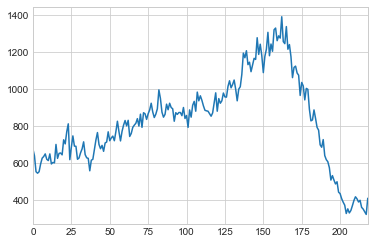

In [49]:
df['homes'].plot() 

plt.show()

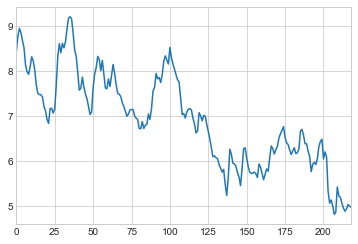

In [50]:
df['irate'].plot() 
plt.show()

In [51]:
#Create data index
ts = pd.period_range(start = '1.1.1992',end = '3.1.2010', freq='M')
df['Date'] = ts
df.set_index('Date',inplace=True)

In [52]:
#Implement the test for our simulated data
from statsmodels.tsa.stattools import adfuller

In [53]:
result = adfuller(df['homes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.227023
p-value: 0.904818
Critical Values:
	1%: -4.003
	5%: -3.432
	10%: -3.140


In [54]:
df['dhomes'] = df['homes'].diff(periods=1)
df['dirate'] = df['irate'].diff(periods=1)
df.dropna(inplace=True)


In [55]:
df.parse_dates=[0]

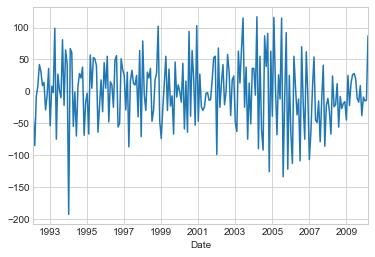

In [56]:
df['dhomes'].plot() 
plt.show()

In [57]:
result = adfuller(df['dhomes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.425932
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [58]:
result = adfuller(df['dirate'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.673954
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [59]:
#creating lagged variables
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag2_dirate'] = df['dirate'].shift(2)
df.dropna(inplace=True)

In [60]:
df.head()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate
Date,,,,,,,
1992-04,546,8.85,-8.0,-0.09,-85.0,0.18,0.33
1992-05,554,8.67,8.0,-0.18,-8.0,-0.09,0.18
1992-06,596,8.51,42.0,-0.16,8.0,-0.18,-0.09
1992-07,627,8.13,31.0,-0.38,42.0,-0.16,-0.18
1992-08,636,7.98,9.0,-0.15,31.0,-0.38,-0.16


In [61]:
# Prepare target and input variables. 
X_multi=df.drop(['homes','irate','dhomes','dirate'], axis=1)
Y_target=df.dhomes

In [62]:
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [63]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.40
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           1.67e-07
Time:                        13:22:29   Log-Likelihood:                -1143.7
No. Observations:                 216   AIC:                             2295.
Df Residuals:                     212   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4912      3.333     -0.748      